In [1]:
!ls archive-3


Test  Train


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

/Users/krishsheth/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import os 


# Walk through files 

for dirpath,dirnames,filenames in os.walk("archive-3"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 2 directories and 1 images in archive-3
there are 27 directories and 1 images in archive-3/Test
there are 0 directories and 1 images in archive-3/Test/03
there are 0 directories and 1 images in archive-3/Test/04
there are 0 directories and 1 images in archive-3/Test/05
there are 0 directories and 1 images in archive-3/Test/02
there are 0 directories and 1 images in archive-3/Test/20
there are 0 directories and 1 images in archive-3/Test/18
there are 0 directories and 1 images in archive-3/Test/27
there are 0 directories and 1 images in archive-3/Test/11
there are 0 directories and 1 images in archive-3/Test/16
there are 0 directories and 1 images in archive-3/Test/17
there are 0 directories and 1 images in archive-3/Test/10
there are 0 directories and 1 images in archive-3/Test/19
there are 0 directories and 1 images in archive-3/Test/26
there are 0 directories and 1 images in archive-3/Test/21
there are 0 directories and 1 images in archive-3/Test/07
there are 0 directories 

In [4]:
num_signature=len(os.listdir("archive-3/Train/01"))
num_signature

79

## Getting class names 

In [5]:
import pathlib
import numpy as np
data_dir=pathlib.Path("archive-3/Train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))

In [6]:
print(class_names[1:])

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27']


In [7]:
class_names=class_names[1:]
class_names

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27'], dtype='<U9')

In [8]:
## Visualize the images 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random

In [9]:
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    
    # Get random path
    random_image=random.sample(os.listdir(target_folder),1)
    # Read the image and plot
    img=mpimg.imread(target_folder+ "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape:{img.shape}")# Show the image shape
    
    return img

Image shape:(108, 184, 3)


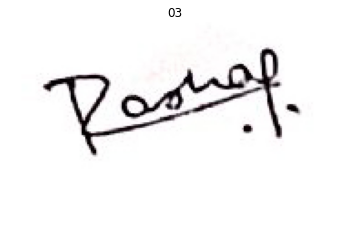

In [10]:

img=view_random_image(target_dir="archive-3/Train/",
                     target_class="03")

## Pre-Processing images

In [11]:
# Changing the image shapes to the desired shapes 
tf.random.set_seed(42)

In [12]:
train_dir="archive-3/Train"
test_dir="archive-3/Test"

In [13]:
def image_generator():

    train_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen=ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        seed=42,
                                                        class_mode='categorical')
    test_generator=test_datagen.flow_from_directory(directory=test_dir,
                                                   target_size=(224,224),
                                                   seed=42,
                                                   class_mode="categorical")


    return train_generator,test_generator

In [14]:
img_gen=image_generator()

Found 2263 images belonging to 27 classes.
Found 29 images belonging to 27 classes.


In [15]:
# Preprocess the data 
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

# Set up path to data directories
train_dir="archive-3/Train"
test_dir="archive-3/Test"

# Import images and turn to batches 
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              seed=42,
                                              class_mode="categorical")
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                          
                                          target_size=(224,224),
                                          seed=42,
                                          class_mode="categorical")

Found 2263 images belonging to 27 classes.
Found 29 images belonging to 27 classes.


In [16]:
len(img_gen[0])

71

In [17]:
len(img_gen[1])

1

## Build and train model (Deep learning)

In [18]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(27, activation="softmax") # multiclass activation output
])


2023-03-20 21:59:49.893761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model_1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])


In [20]:
history=model_1.fit(train_data,
                    epochs=3,
                   validation_data=test_data)

Epoch 1/3
71/71 [==============================] - 46s 645ms/step - loss: 1.7451 - accuracy: 0.5440 - val_loss: 0.6788 - val_accuracy: 0.7931
Epoch 2/3
71/71 [==============================] - 43s 606ms/step - loss: 0.2781 - accuracy: 0.9337 - val_loss: 0.5452 - val_accuracy: 0.8276
Epoch 3/3
71/71 [==============================] - 44s 620ms/step - loss: 0.0349 - accuracy: 0.9920 - val_loss: 0.7385 - val_accuracy: 0.7586


In [21]:
model_1.save("/Users/krishsheth/Desktop/projects/Signature_recognition/Saved models/")
del model_1

INFO:tensorflow:Assets written to: /Users/krishsheth/Desktop/projects/Signature_recognition/Saved models/assets


INFO:tensorflow:Assets written to: /Users/krishsheth/Desktop/projects/Signature_recognition/Saved models/assets


## Plot Curves of accuracy and loss with Epochs

In [22]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']


  accuracy = history.history['accuracy']


  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
 
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
     

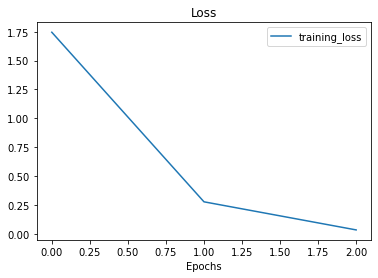

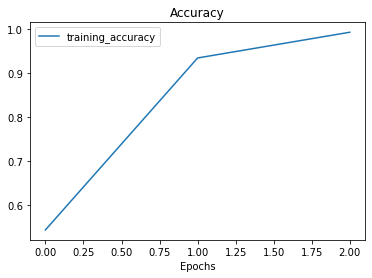

In [23]:
plot_loss_curves(history)

In [24]:
model_1 = keras.models.load_model("/Users/krishsheth/Desktop/projects/Signature_recognition/Saved models/")

In [25]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Image shape:(210, 242, 3)


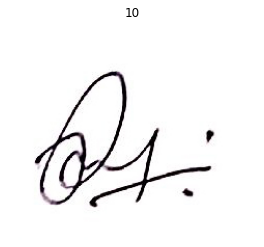

In [26]:
img_custom=view_random_image(target_dir="archive-3/Test/",
                     target_class="10")

In [27]:
img_custom=tf.image.resize(img_custom,size=(224,224))

In [28]:
print(f"Shape before new dimension: {img_custom.shape}")
img_custom = tf.expand_dims(img_custom, axis=0)
print(f"Shape after new dimension: {img_custom.shape}")


Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


In [29]:
pred = model_1.predict(img_custom)

pred=pred.squeeze()


1/1 [==============================] - 0s 78ms/step


In [30]:
pred.shape

(27,)

In [31]:
import pandas as pd


In [32]:
df=pd.DataFrame(pred)
df

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,1.0


In [33]:
for index,i in enumerate(pred):
    if(i>=0.8):
        print(i)
        print(index+1)

        

1.0
10


In [34]:
import matplotlib.pyplot as plt


## Image Segmentation 

In [35]:
img_test=plt.imread("test.jpg")

In [36]:
img_test.shape

(224, 126, 3)

In [37]:
img_test=tf.image.resize(img_test,size=(224,224))


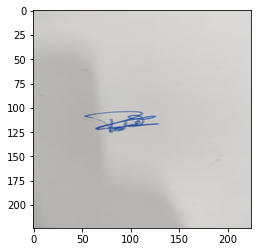

In [38]:
plt.imshow(img_test)

In [39]:
img_test.shape

TensorShape([224, 224, 3])

In [40]:
print(f"Shape before new dimension: {img_test.shape}")
img_test = tf.expand_dims(img_test, axis=0)
print(f"Shape after new dimension: {img_test.shape}")

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


## Prediction of Model 
- image of prateek (not present in database )

In [41]:
pred_test= model_1.predict(img_test)

pred_test=pred_test.squeeze()

1/1 [==============================] - 0s 20ms/step


In [42]:
pred_test

array([0.03490945, 0.01909086, 0.03863171, 0.04878614, 0.04334174,
       0.02400568, 0.03192097, 0.0262915 , 0.03396535, 0.01687071,
       0.08792524, 0.01524642, 0.0104015 , 0.07492555, 0.01456792,
       0.01573258, 0.02625991, 0.02216467, 0.02344573, 0.03918131,
       0.05927476, 0.07193104, 0.03968642, 0.03531026, 0.0477781 ,
       0.06965984, 0.02869466], dtype=float32)

In [43]:
df_test=pd.DataFrame(pred_test)
df_test

,0
0,0.034909
1,0.019091
2,0.038632
3,0.048786
4,0.043342
5,0.024006
6,0.031921
7,0.026292
8,0.033965
9,0.016871


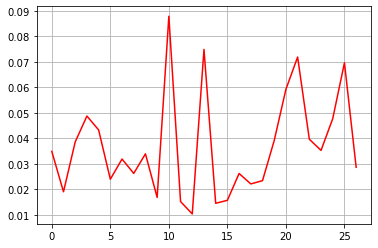

In [44]:
plt.plot(df_test,color="r")
plt.grid()